In [ ]:
Nurshanov Dias it3-2208
comp math 8 lab
Cubic spline

In [9]:
# 1 Code implementation (your own, no existing method for interpolation).
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt

f = np.tan

# Linear spline
def linear_spline(x_vals, y_vals, x):
    for j in range(len(x_vals) - 1):
        x0, x1 = x_vals[j], x_vals[j + 1]
        y0, y1 = y_vals[j], y_vals[j + 1]
        if x0 <= x <= x1:
            return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    return None


# Quadratic spline
def quadratic_spline(x_vals, y_vals, x):
    for j in range(1, len(x_vals) - 1):
        x0, x1, x2 = x_vals[j - 1], x_vals[j], x_vals[j + 1]
        y0, y1, y2 = y_vals[j - 1], y_vals[j], y_vals[j + 1]
        if x0 <= x <= x2:
            a = y0 * (x - x1) * (x - x2) / ((x0 - x1) * (x0 - x2))
            b = y1 * (x - x0) * (x - x2) / ((x1 - x0) * (x1 - x2))
            c = y2 * (x - x0) * (x - x1) / ((x2 - x0) * (x2 - x1))
            return a + b + c
    return None


# Cubic spline
def cubic_spline(x_vals, y_vals, x):
    for j in range(len(x_vals) - 3):
        x0, x1, x2, x3 = x_vals[j], x_vals[j + 1], x_vals[j + 2], x_vals[j + 3]
        y0, y1, y2, y3 = y_vals[j], y_vals[j + 1], y_vals[j + 2], y_vals[j + 3]
        if x0 <= x <= x3:
            a = y0 * (x - x1) * (x - x2) * (x - x3) / ((x0 - x1) * (x0 - x2) * (x0 - x3))
            b = y1 * (x - x0) * (x - x2) * (x - x3) / ((x1 - x0) * (x1 - x2) * (x1 - x3))
            c = y2 * (x - x0) * (x - x1) * (x - x3) / ((x2 - x0) * (x2 - x1) * (x2 - x3))
            d = y3 * (x - x0) * (x - x1) * (x - x2) / ((x3 - x0) * (x3 - x1) * (x3 - x2))
            return a + b + c + d
    return None

x_vals = np.linspace(0, math.pi / 2 - 0.1, 10)
y_vals = [f(x) for x in x_vals]

x_points = np.linspace(0, math.pi / 2 - 0.1, 100)
f_values = [f(x) for x in x_points]
s1_values = [linear_spline(x_vals, y_vals, x) for x in x_points]
s2_values = [quadratic_spline(x_vals, y_vals, x) for x in x_points]
s3_values = [cubic_spline(x_vals, y_vals, x) for x in x_points]

delta_s1 = np.abs(np.array(f_values) - np.array(s1_values))
delta_s2 = np.abs(np.array(f_values) - np.array(s2_values))
delta_s3 = np.abs(np.array(f_values) - np.array(s3_values))

data = {
    'x': x_points,
    'f(x)': f_values,
    's1(x)': s1_values,
    's2(x)': s2_values,
    's3(x)': s3_values,
    'delta_s1': delta_s1,
    'delta_s2': delta_s2,
    'delta_s3': delta_s3
}






In [10]:
# 2 output of the code in form of the table
table = pd.DataFrame(data)
table

,x,f(x),s1(x),s2(x),s3(x),delta_s1,delta_s2,delta_s3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.014857,0.014858,0.014990,0.014609,0.014909,0.000133,0.000248,0.000051
2,0.029713,0.029722,0.029980,0.029295,0.029809,0.000259,0.000427,0.000087
3,0.044570,0.044599,0.044971,0.044057,0.044707,0.000372,0.000543,0.000108
4,0.059426,0.059496,0.059961,0.058894,0.059614,0.000465,0.000602,0.000118
...,...,...,...,...,...,...,...,...
95,1.411370,6.219266,7.690765,7.141244,6.892194,1.471499,0.921979,0.672929
96,1.426227,6.868827,8.259735,7.788717,7.563386,1.390908,0.919890,0.694559
97,1.441083,7.666038,8.828705,8.475441,8.297549,1.162667,0.809404,0.631511
98,1.455940,8.668195,9.397675,9.201417,9.097646,0.729480,0.533222,0.429451


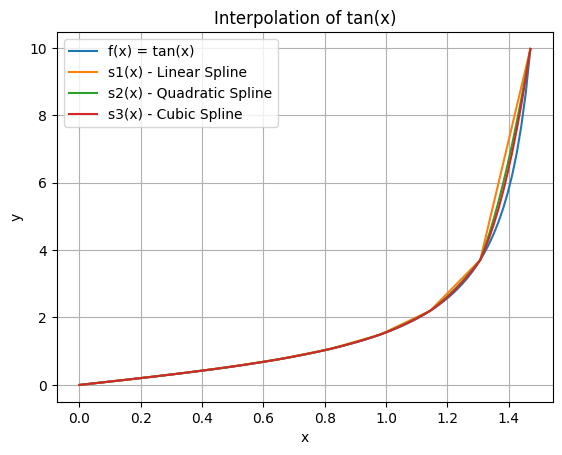

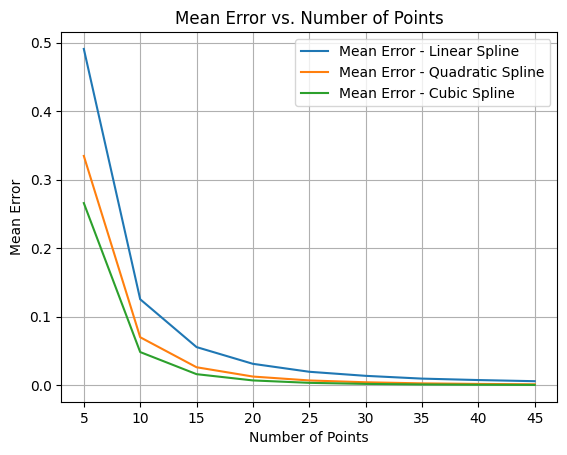

In [11]:
"""
3
Graphs:
    a  Graph of distribution of real function f(x) and spline of the first order, 
    second order  and the cubic spline (s_1(x), s_2(x) and s_3(x)) (on one graph)
    
    
    b  Dependence of mean average error value on number of points used in your domain.
"""
plt.plot(x_points, f_values, label='f(x) = tan(x)')
plt.plot(x_points, s1_values, label='s1(x) - Linear Spline')
plt.plot(x_points, s2_values, label='s2(x) - Quadratic Spline')
plt.plot(x_points, s3_values, label='s3(x) - Cubic Spline')
plt.legend()
plt.title('Interpolation of tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

points_counts = range(5, 50, 5)
mean_errors_s1 = []
mean_errors_s2 = []
mean_errors_s3 = []

for n in points_counts:
    x_vals = np.linspace(0, math.pi / 2 - 0.1, n)
    y_vals = [f(x) for x in x_vals]
    s1_values = [linear_spline(x_vals, y_vals, x) for x in x_points]
    s2_values = [quadratic_spline(x_vals, y_vals, x) for x in x_points]
    s3_values = [cubic_spline(x_vals, y_vals, x) for x in x_points]
    mean_errors_s1.append(np.mean(np.abs(np.array(f_values) - np.array(s1_values))))
    mean_errors_s2.append(np.mean(np.abs(np.array(f_values) - np.array(s2_values))))
    mean_errors_s3.append(np.mean(np.abs(np.array(f_values) - np.array(s3_values))))

plt.plot(points_counts, mean_errors_s1, label='Mean Error - Linear Spline')
plt.plot(points_counts, mean_errors_s2, label='Mean Error - Quadratic Spline')
plt.plot(points_counts, mean_errors_s3, label='Mean Error - Cubic Spline')
plt.legend()
plt.title('Mean Error vs. Number of Points')
plt.xlabel('Number of Points')
plt.ylabel('Mean Error')
plt.grid(True)
plt.show()